In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
from sys import version

import cbgt

print(f"Python: {version}")
print(f"  >      numpy: {np.__version__}")
print(f"  > matplotlib: {mpl.__version__}")


Python: 3.12.9 (main, Feb  4 2025, 14:38:38) [GCC 14.2.1 20241116]
  >      numpy: 2.2.3
  > matplotlib: 3.10.1


In [2]:
%%time
np.random.seed(69)

n_gpe, n_stn = 10, 10
i_app_gpe = lambda t, n: -1.2

c_g_s = np.zeros((n_gpe, n_stn), dtype=np.float64)
c_s_g = np.zeros((n_stn, n_gpe), dtype=np.float64)
c_g_g = (~np.eye(n_gpe, dtype=np.bool)).astype(np.float64)

for idx_g in range(n_gpe):
    ids_s = np.random.choice(np.arange(n_stn), size=3, replace=False)
    c_g_s[idx_g, ids_s] = 1

c_s_g[np.arange(n_stn), np.random.permutation(n_gpe)] = 1

rt = cbgt.RubinTerman(dt=0.01, total_t=2, i_app_gpe=i_app_gpe, 
                      parameters_settings="episodic",
                      c_g_s=c_g_s, c_s_g=c_s_g, c_g_g=c_g_g
)
data = rt.run()

Simulation completed!
CPU times: user 1.4 s, sys: 212 ms, total: 1.62 s
Wall time: 1.6 s


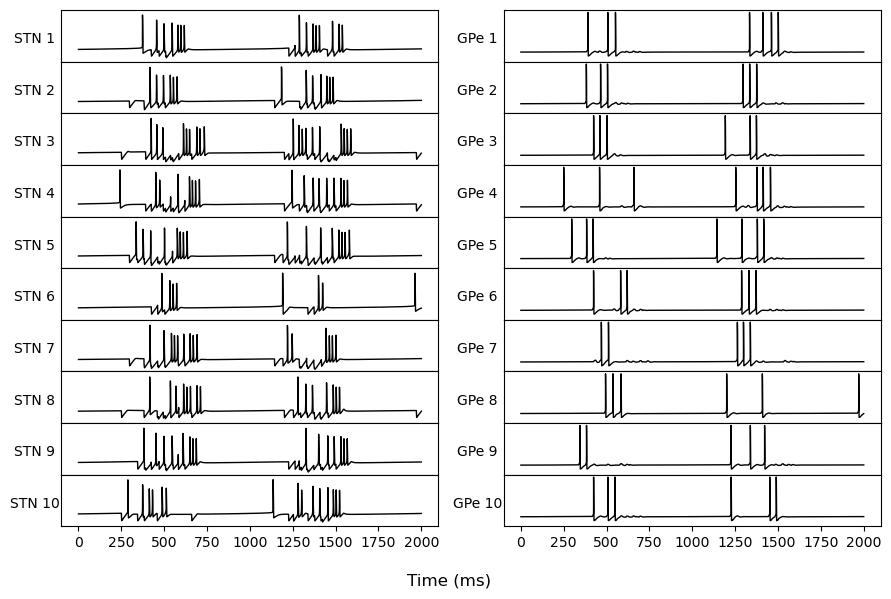

In [3]:
N_stn = rt.num_stn
fig, axs = plt.subplots(N_stn, 2, figsize=(9, (N_stn)*0.6), 
                            sharex=True, sharey=True, tight_layout=True, gridspec_kw={'hspace': 0})

for i, (trace, ax) in enumerate(zip(data["stn"]["v"].T, axs[:,0])):
    ax.plot(trace, 'k', lw=1)
    ax.set_yticks([])
    ax.set_ylabel(f"STN {i+1}", rotation=0, labelpad=10)
    ax.yaxis.set_label_coords(-0.07, 0.3)
    
for i, (trace, ax) in enumerate(zip(data["gpe"]["v"].T, axs[:, 1])):
    ax.plot(trace, 'k', lw=1)
    ax.set_yticks([])
    ax.set_ylabel(f"GPe {i+1}", rotation=0, labelpad=10)
    ax.yaxis.set_label_coords(-0.07, 0.3)

axs[-1,0].xaxis.set_major_formatter(lambda x, _: f"{x*rt.dt:.0f}")

fig.supxlabel("Time (ms)")
    
plt.show()

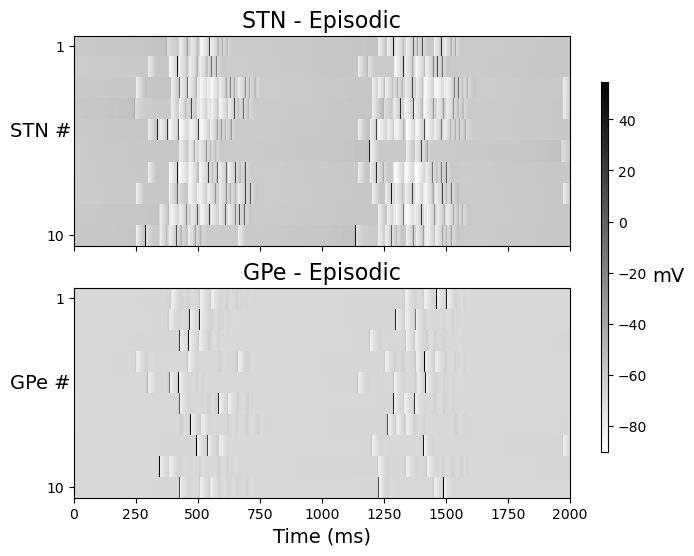

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, N_stn*0.6))

# Compute global min and max for consistent color scaling
vmin = min(data["stn"]["v"].min(), data["gpe"]["v"].min())
vmax = max(data["stn"]["v"].max(), data["gpe"]["v"].max())
cmap = "gray_r"

im1 = ax1.imshow(data["stn"]["v"].T, aspect='auto', cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
ax1.set_yticks([0,9])
ax1.set_yticklabels([1,10])
ax1.set_ylabel("STN #", rotation=0, fontsize=14)
# ax1.set_yticklabels([f"STN {i+1}" for i in range(N_stn)])

# GPe image plot
ax2.imshow(data["gpe"]["v"].T, aspect='auto', cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
ax2.set_yticks([0,9])
ax2.set_yticklabels([1,10])
ax2.set_ylabel("GPe #", rotation=0, fontsize=14)

ax2.set_xticks(np.linspace(0, 200000,9))
ax2.xaxis.set_major_formatter(lambda x, _: f"{x*0.01:.0f}")

ax2.set_xlabel("Time (ms)", fontsize=14)

cbar = fig.colorbar(im1, ax=[ax1, ax2], location="right", label="Voltage (mV)", shrink=0.8, aspect=50)
cbar.set_label("mV", rotation=0, fontsize=14, labelpad=15)
ax1.set_title("STN - Episodic", fontsize=16)
ax2.set_title("GPe - Episodic", fontsize=16)

plt.show()

In [15]:
%%time
# np.random.seed(69)

n_gpe, n_stn = 10, 10
i_app_gpe = lambda t, n: -1.2

c_g_s = np.zeros((n_gpe, n_stn), dtype=np.float64)
c_s_g = np.zeros((n_stn, n_gpe), dtype=np.float64)
c_g_g = (~np.eye(n_gpe, dtype=np.bool)).astype(np.float64)

c_s_g[0, [0,1,-1]] = 1
for i in range(n_stn-1):
    c_s_g[i+1] = np.roll(c_s_g[i], 1)

c_g_s[0, [0,1,2,-1,-2]] = 1
for i in range(n_gpe-1):
    c_g_s[i+1] = np.roll(c_g_s[i], 1) 

rt = cbgt.RubinTerman(dt=0.01, total_t=2, i_app_gpe=i_app_gpe, 
                      parameters_settings="wave",
                      c_g_s=c_g_s, c_s_g=c_s_g, c_g_g=c_g_g
)
data = rt.run()

CPU times: user 1.44 s, sys: 179 ms, total: 1.62 sSimulation completed!

Wall time: 1.6 s


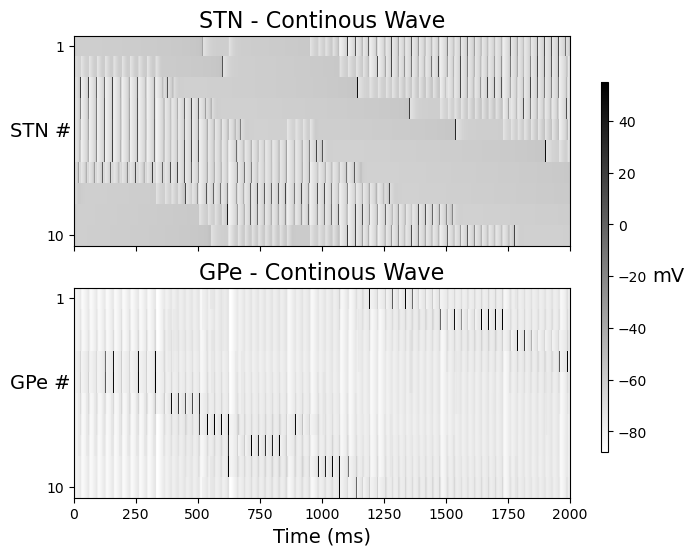

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, N_stn*0.6))

# Compute global min and max for consistent color scaling
vmin = min(data["stn"]["v"].min(), data["gpe"]["v"].min())
vmax = max(data["stn"]["v"].max(), data["gpe"]["v"].max())
cmap = "gray_r"

im1 = ax1.imshow(data["stn"]["v"].T, aspect='auto', cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
ax1.set_yticks([0,9])
ax1.set_yticklabels([1,10])
ax1.set_ylabel("STN #", rotation=0, fontsize=14)
# ax1.set_yticklabels([f"STN {i+1}" for i in range(N_stn)])

# GPe image plot
ax2.imshow(data["gpe"]["v"].T, aspect='auto', cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
ax2.set_yticks([0,9])
ax2.set_yticklabels([1,10])
ax2.set_ylabel("GPe #", rotation=0, fontsize=14)

ax2.set_xticks(np.linspace(0, 200000,9))
ax2.xaxis.set_major_formatter(lambda x, _: f"{x*0.01:.0f}")

ax2.set_xlabel("Time (ms)", fontsize=14)

cbar = fig.colorbar(im1, ax=[ax1, ax2], location="right", label="Voltage (mV)", shrink=0.8, aspect=50)
cbar.set_label("mV", rotation=0, fontsize=14, labelpad=15)
ax1.set_title("STN - Continous Wave", fontsize=16)
ax2.set_title("GPe - Continous Wave", fontsize=16)

plt.show()

In [2]:
%%time
importlib.reload(cbgt)
# np.random.seed(69)

n_gpe, n_stn = 8, 8
i_app_gpe = lambda t, n: -1.

c_g_s = np.zeros((n_gpe, n_stn), dtype=np.float64)
c_s_g = np.eye((n_stn), dtype=np.float64)
c_g_g = np.zeros((n_gpe, n_gpe), dtype=np.float64)

c_g_g[0, [1,-1]] = 1
for i in range(n_stn-1):
    c_g_g[i+1] = np.roll(c_g_g[i], 1)

c_g_s[0, [2,-2]] = 1
for i in range(n_stn-1):
    c_g_s[i+1] = np.roll(c_g_s[i], 1)

rt = cbgt.RubinTerman(dt=0.01, total_t=2, i_app_gpe=i_app_gpe, num_gpe=n_gpe, num_stn=n_stn,
                      parameters_settings="wave",
                      c_g_s=c_g_s, c_s_g=c_s_g, c_g_g=c_g_g
)
data = rt.run()

Loading ics
Loaded ics
Loading ics
Loaded ics
CPU times: user 1.24 s, sys: 183 ms, total: 1.42 s
Wall time: 1.41 s
Running loop
Simulation completed!


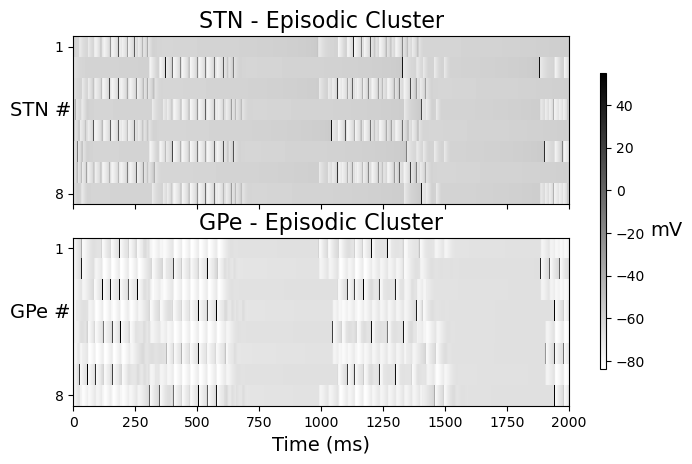

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, n_stn*0.6))

# Compute global min and max for consistent color scaling
vmin = min(data["stn"]["v"].min(), data["gpe"]["v"].min())
vmax = max(data["stn"]["v"].max(), data["gpe"]["v"].max())
cmap = "gray_r"

im1 = ax1.imshow(data["stn"]["v"].T, aspect='auto', cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
ax1.set_yticks([0,n_stn-1])
ax1.set_yticklabels([1,n_stn])
ax1.set_ylabel("STN #", rotation=0, fontsize=14, labelpad=10)
# ax1.set_yticklabels([f"STN {i+1}" for i in range(N_stn)])

# GPe image plot
ax2.imshow(data["gpe"]["v"].T, aspect='auto', cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
ax2.set_yticks([0,n_stn-1])
ax2.set_yticklabels([1,n_stn])
ax2.set_ylabel("GPe #", rotation=0, fontsize=14, labelpad=10)

ax2.set_xticks(np.linspace(0, 200000,9))
ax2.xaxis.set_major_formatter(lambda x, _: f"{x*0.01:.0f}")

ax2.set_xlabel("Time (ms)", fontsize=14)

cbar = fig.colorbar(im1, ax=[ax1, ax2], location="right", label="Voltage (mV)", shrink=0.8, aspect=50)
cbar.set_label("mV", rotation=0, fontsize=14, labelpad=15)
ax1.set_title("STN - Episodic Cluster", fontsize=16)
ax2.set_title("GPe - Episodic Cluster", fontsize=16)

plt.show()